# Problem Statement

## Predict Loan Eligibility for Dream Housing Finance company

### It's a classification problem where we have to predict whether a loan would be approved or not.

### In a classification problem we have to predict discrete values based on a given set of independent variables. 

# Hypothesis Generation

## It is the process of listing out all possible factors that can affect outcome.

### Salary - Applicants with high income should have more chances of loan approval.

### Previous History - Applicants who have repayed their previous debts should have more chances of loan approval.

### Loan Amount - If loan amount is less, should have more chances of loan approval.

### Loan Term -  Loan for less time period should have more chances of loan approval.

### EMI - Lesser the amount to be paid monthly to repay the loan should have more chances of loan approval.

# Loading Packages

### pandas - For data handling

### numpy - For mathematical calulations

### seaborn - For data visualization

### matplotlib.pyplot - For plotting graphs

### warnings - To ignore any warnings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data

## Train

### Train file will be used for training model, our model will learn from this file. It contains all independent variables and a target variable.

## Test 

### Test file contains all the independent variables but not the target variable. We will apply the model to predict the target variable for test data.

## Reading Data

In [3]:
train = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\train_ctrUa4K.csv")
test = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\test_lAUu6dG.csv")

# Making Copies of Datasets

In [4]:
train_orginal = train.copy()
test_original = test.copy()

# Understanding Data

### Firstly we will check the features present in our data then we will look at their data types

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### We have 12 independent variables and 1 target variable. i.e Loan_Status

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### We will predict the loan status using model built from the train data.

# Data Type of Each Variable

### object - Catgorical variables
### int64 - Integer variables
### float64 - Decimal variables

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Shape of Dataset

## Rows, Columns

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

# Univariate Analysis

### Simplest form of analysing data where we analyze each variable individually.

### Categorical features -Frequency tables or bar plots which will calculate number of each category in a particular variable

### Numerical features - Probability density plots to look at distribution of variable

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Set Normalized to print proportions instead of numbers

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

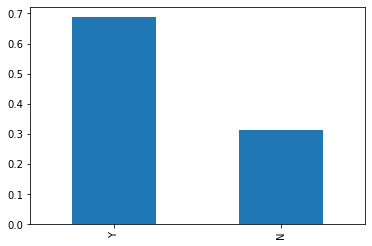

In [11]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

### About 69% (422 out of 614) loan approved 

## Individual Visualization

### Categorical - Gender, Married, Self_Employed, Credit_History, Loan_Status

### Ordinal - Dependents, Education, Property_Area

### Numerical - ApplicantIncome, CoaaplicantIncome, Loan_Amount, Loan_Amount_Term 

## Independent Variables - Categorical

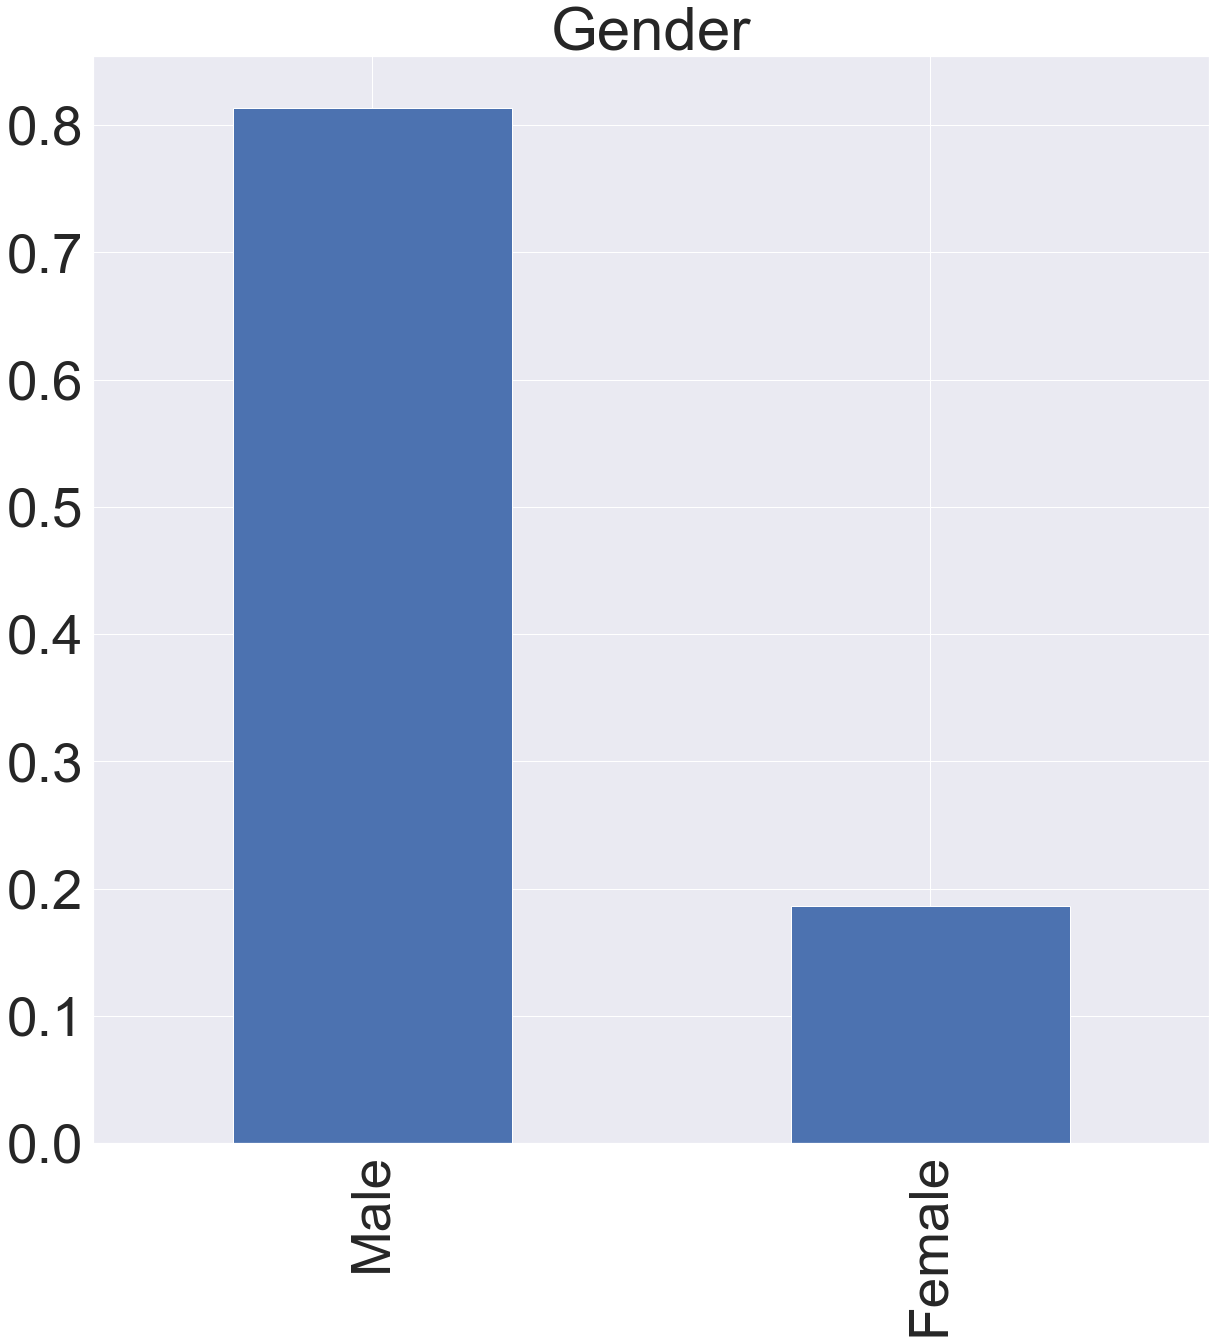

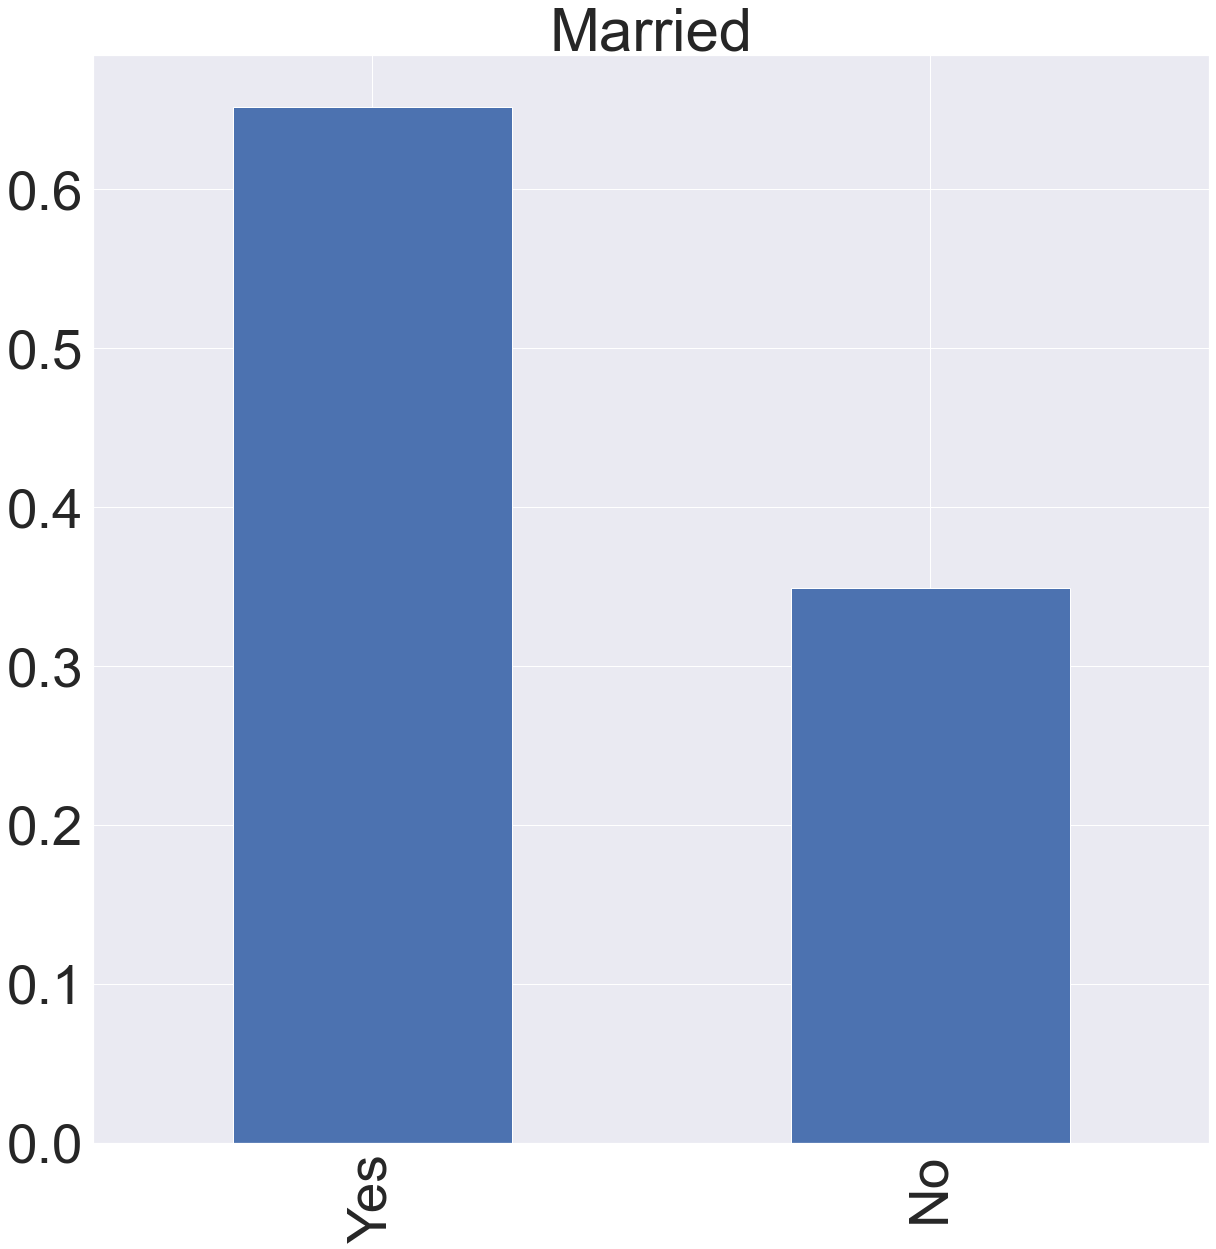

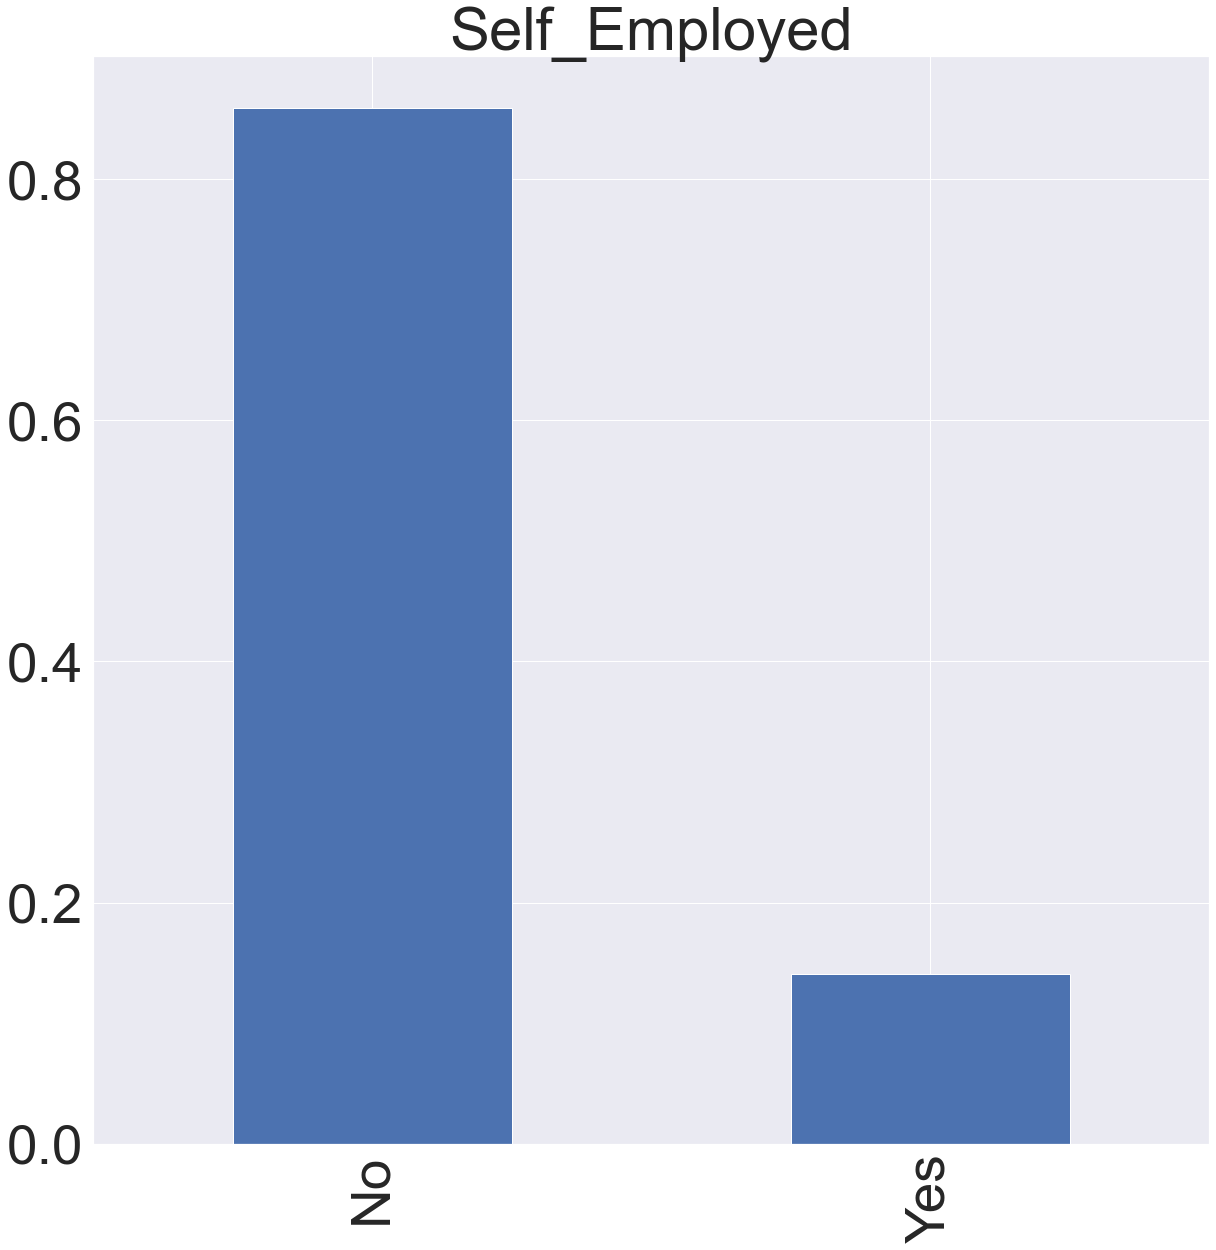

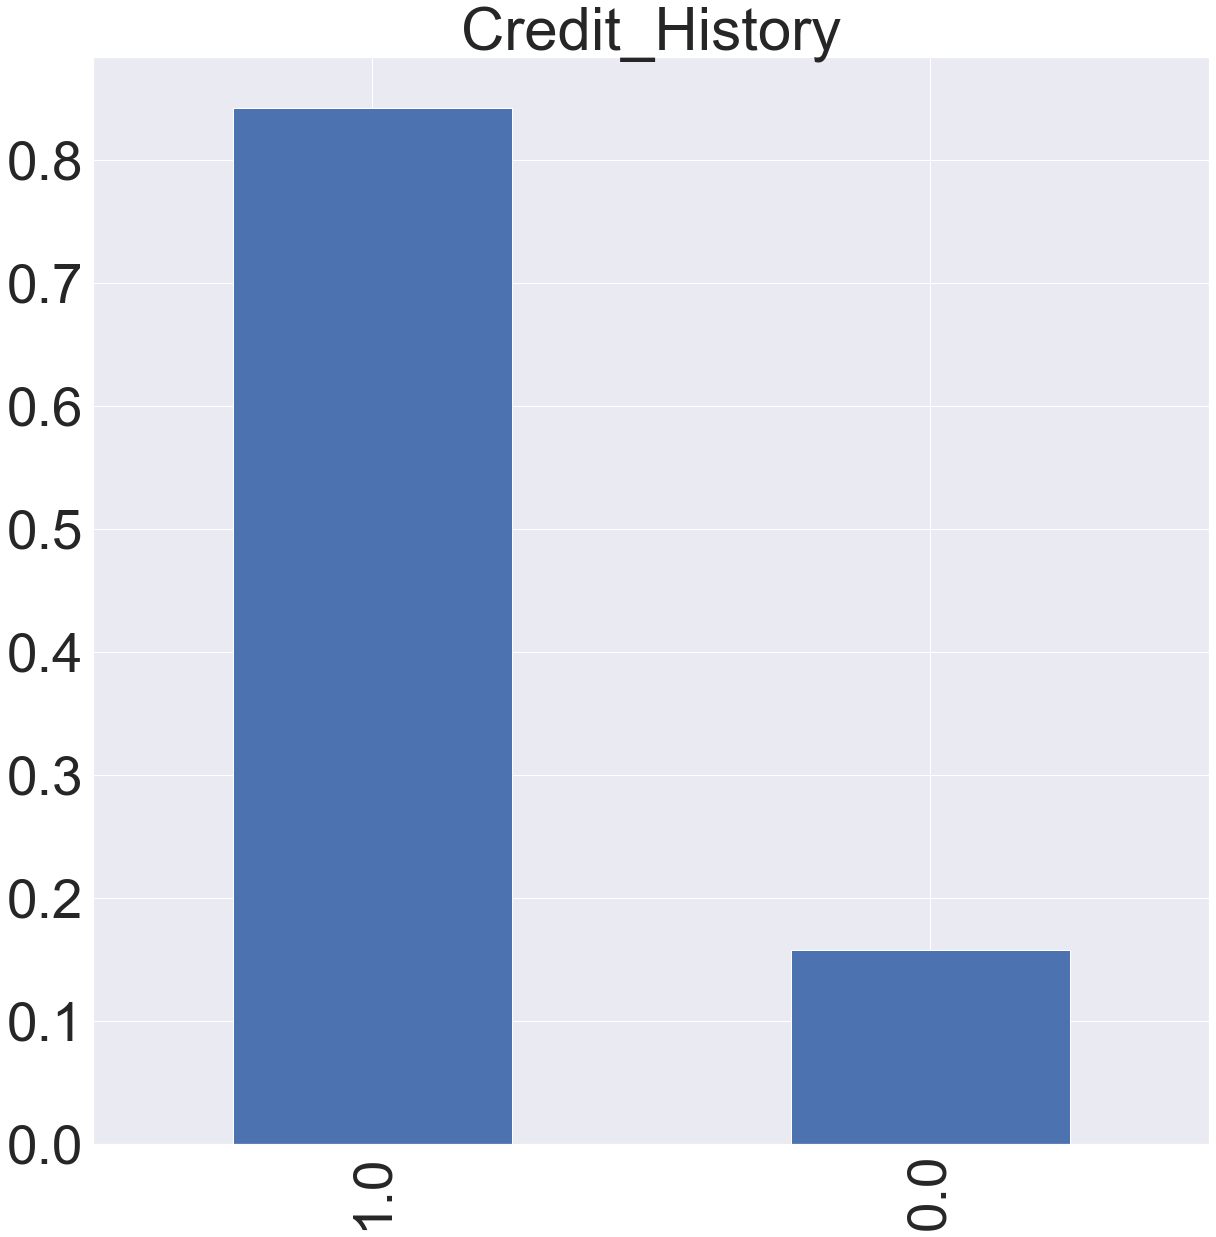

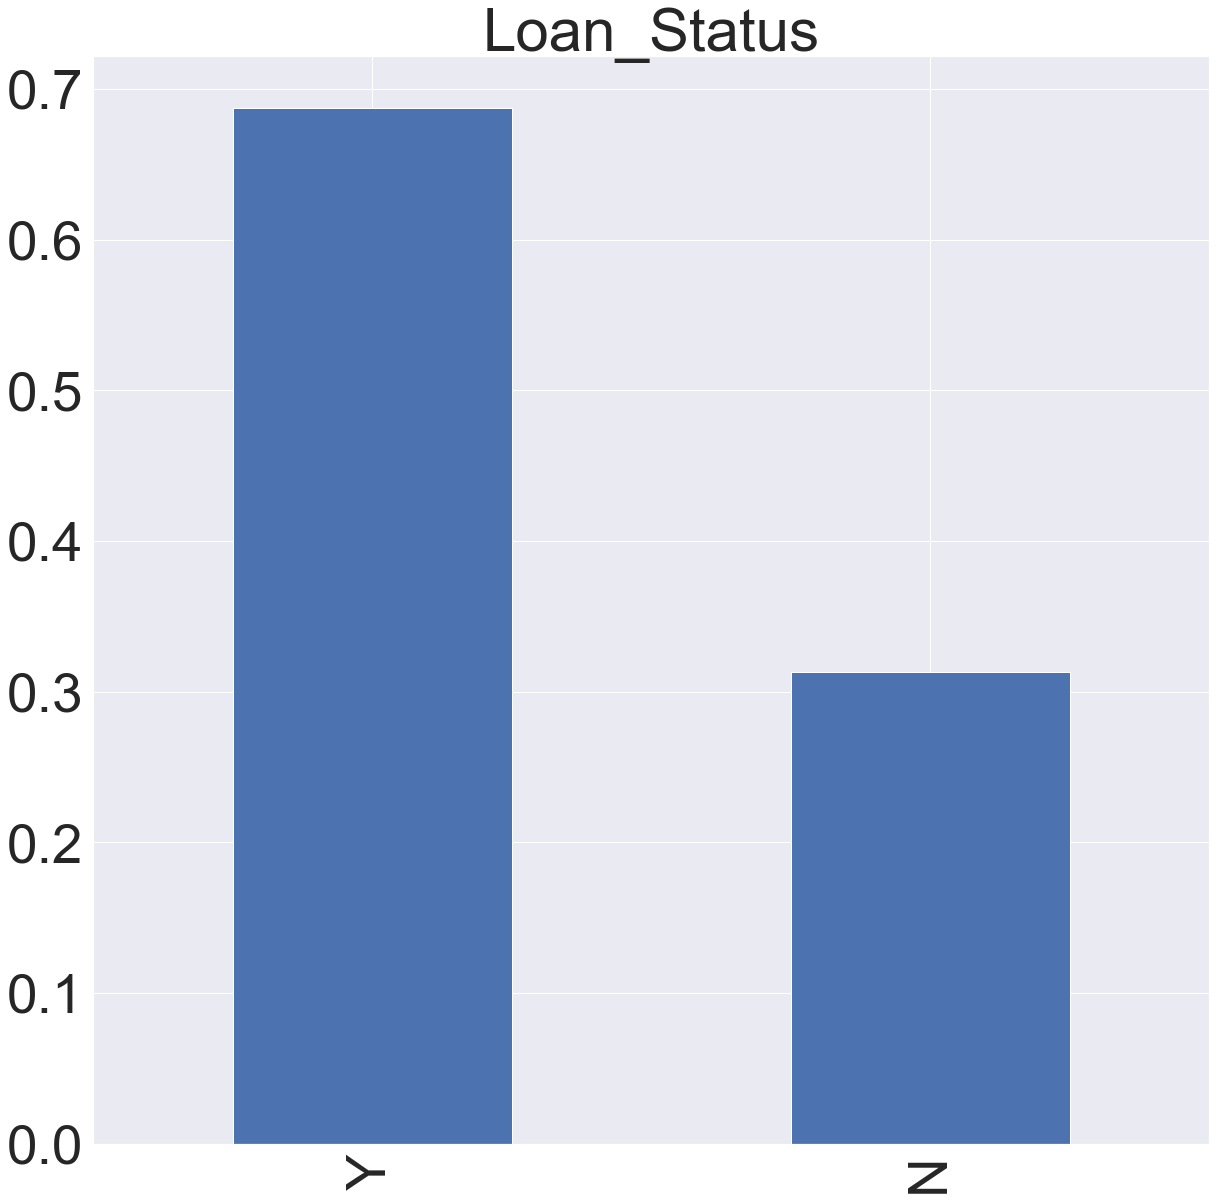

In [12]:
categorical = train[['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Loan_Status']]

sns.set(font_scale = 5)

for i in categorical:
    train[i].value_counts(normalize=True).plot.bar(figsize = (20,20), title = i)
    plt.show()

## From above barplots following inferences are drawn

### 80% applicants are Male
### around 65% applicants are Married
### around 15% applicants are Self_Employed
### around 85% applicants has repayed their debts

## Independent Variables - Ordinal

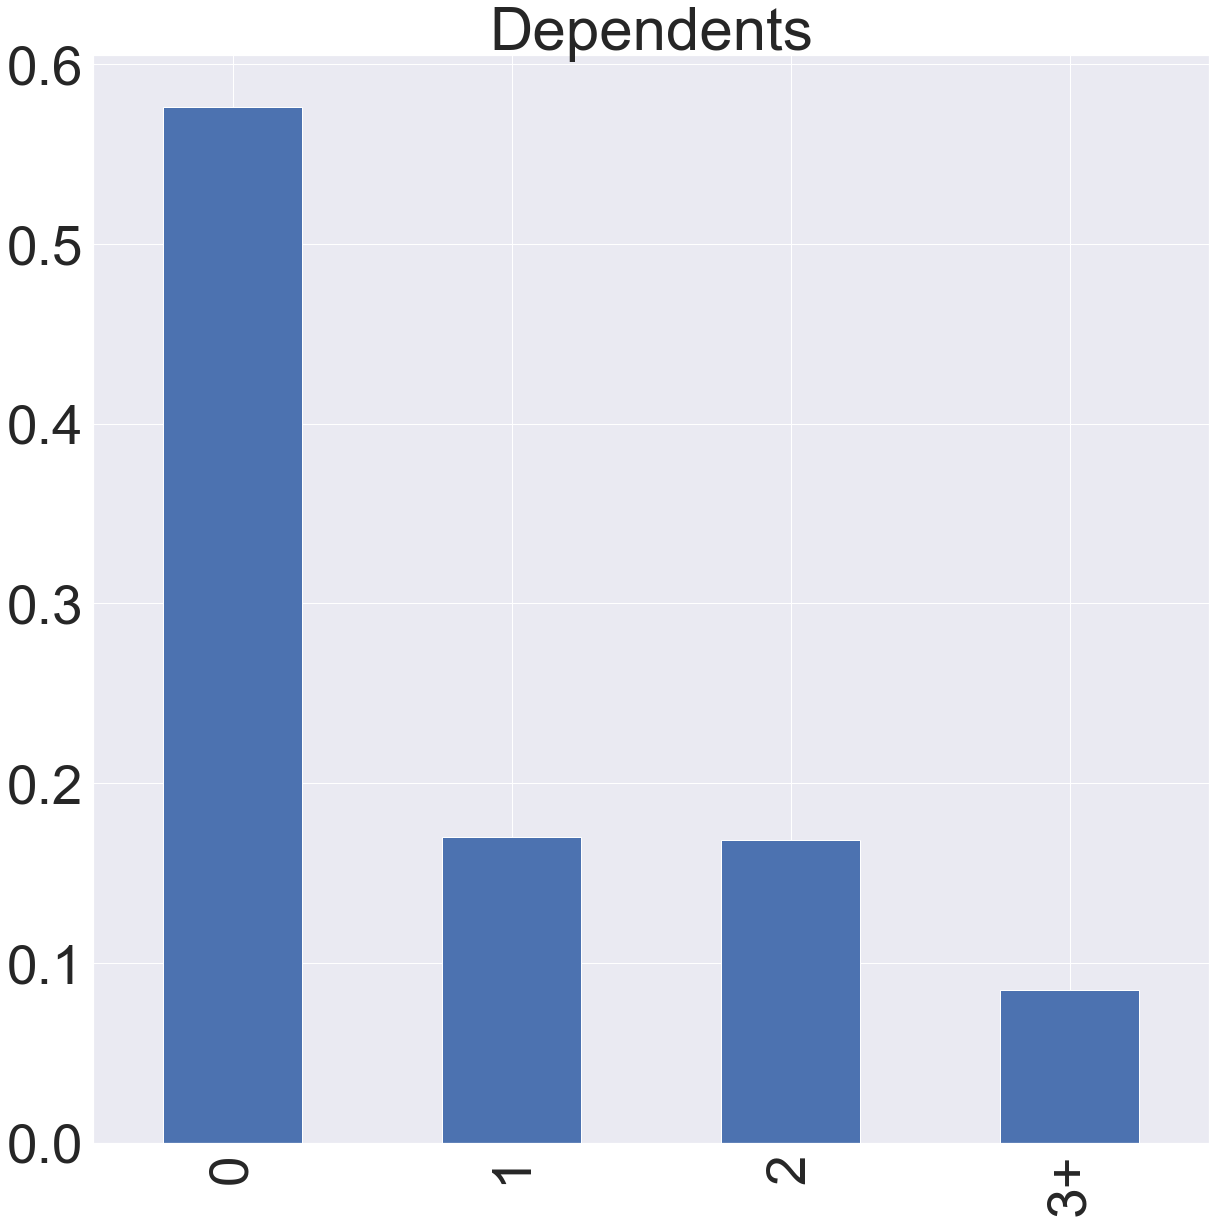

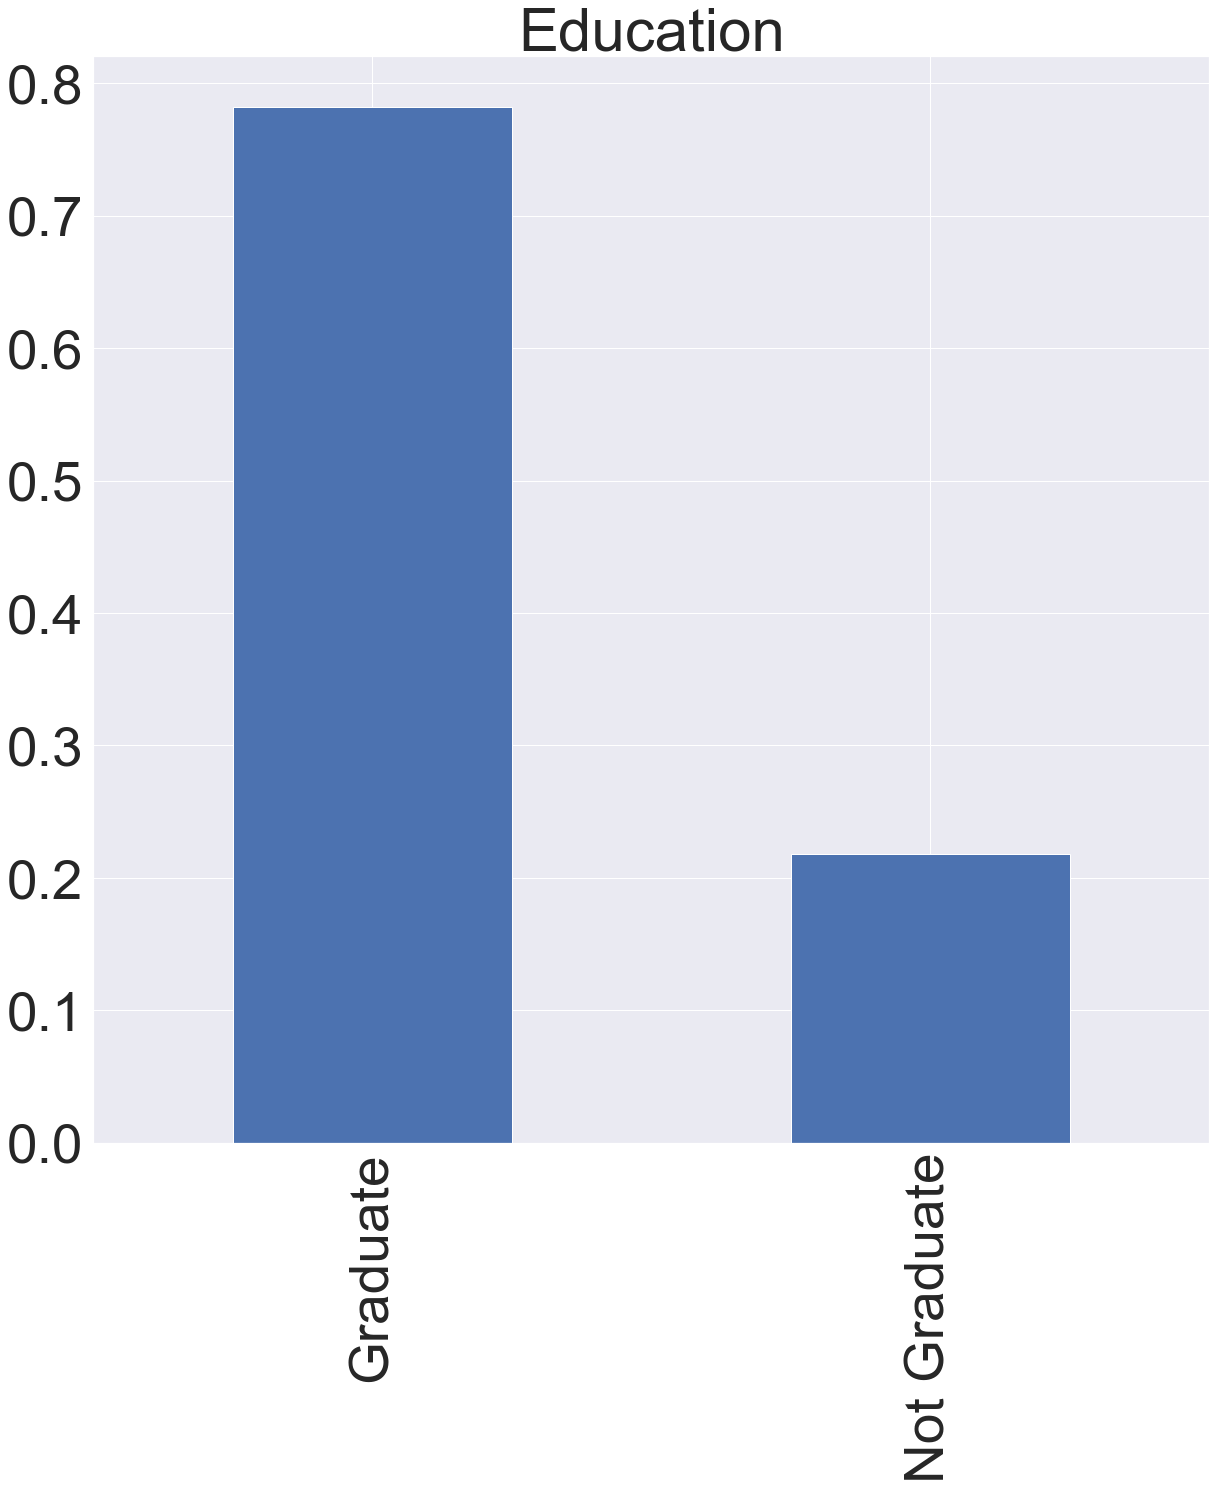

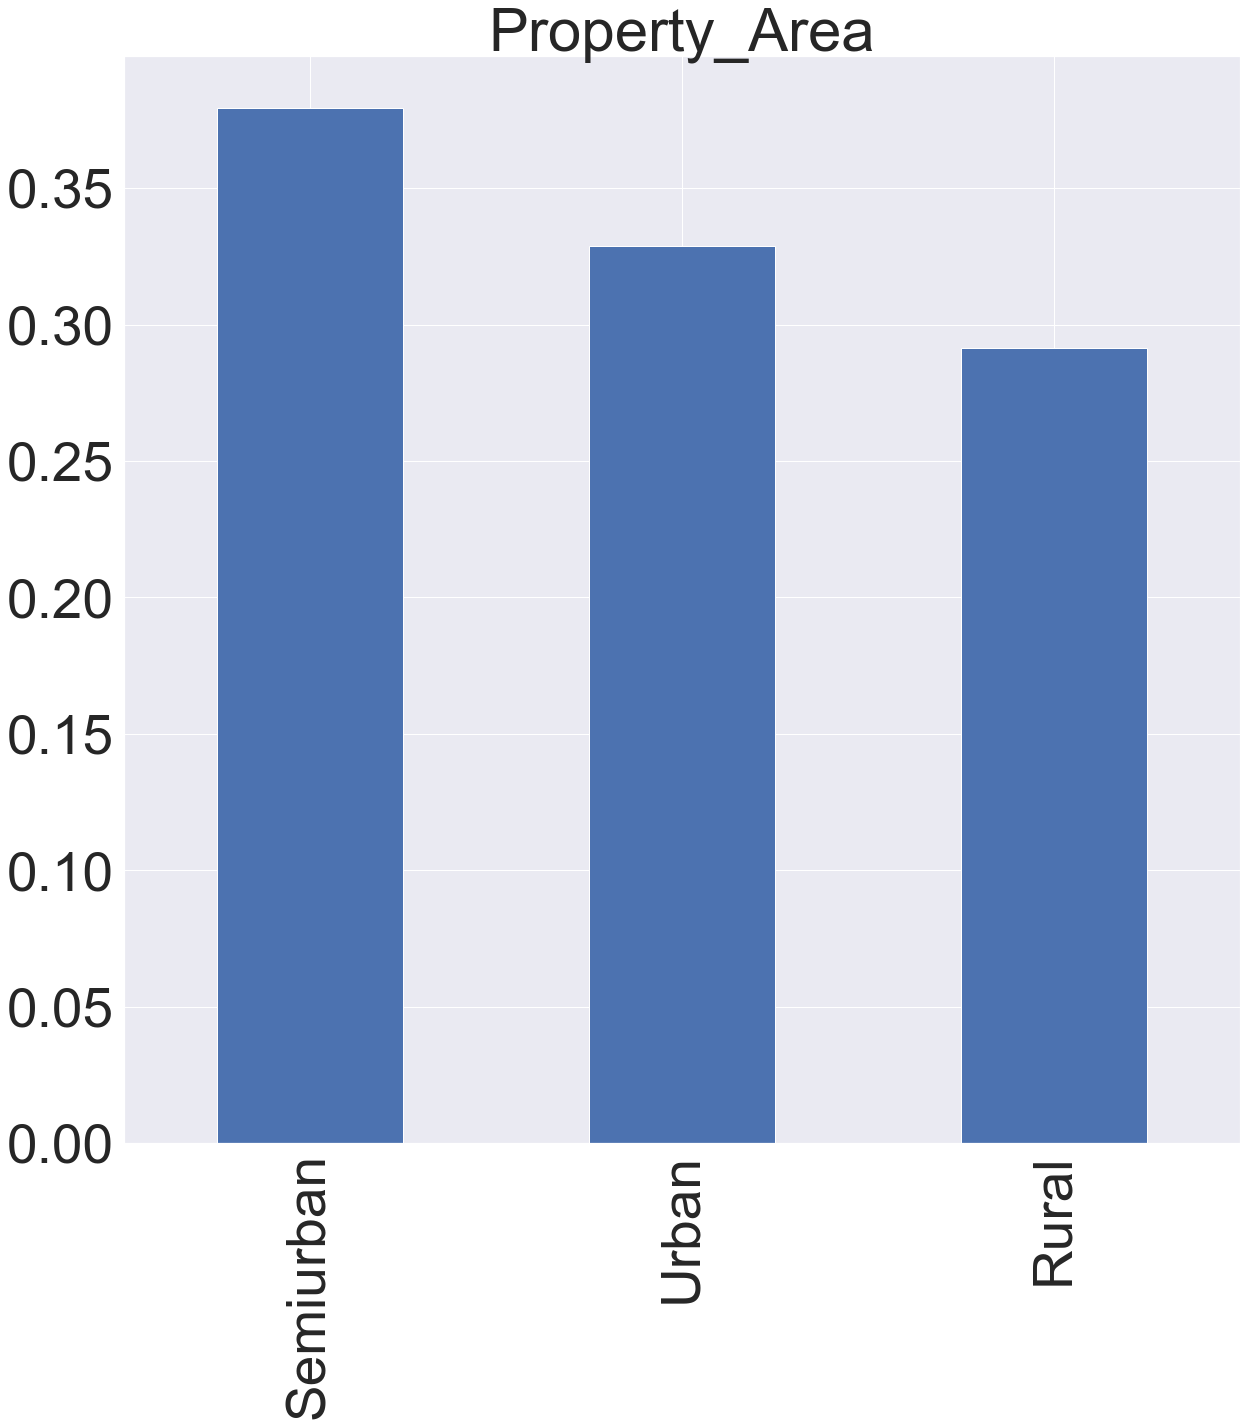

In [13]:
ordinal = train[['Dependents', 'Education', 'Property_Area']]

sns.set(font_scale = 5)

for i in ordinal:
    train[i].value_counts(normalize=True).plot.bar(figsize = (20,20), title = i)
    plt.show()

## From above barplots following inferences are drawn

### Most of applicants don't have dependents
### around 80% applicants are Graduate
### Most of applicants are from semiurban area

## Independent Variables - Numerical

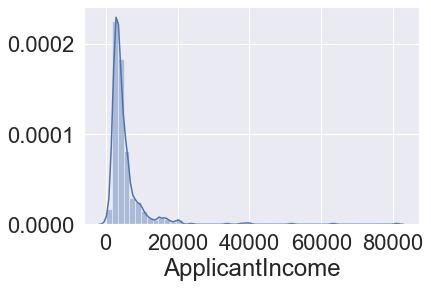

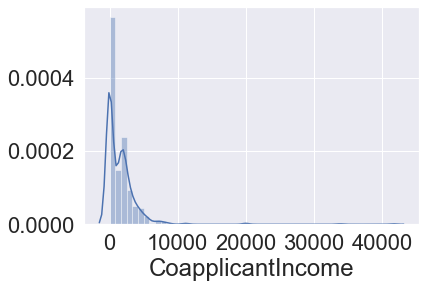

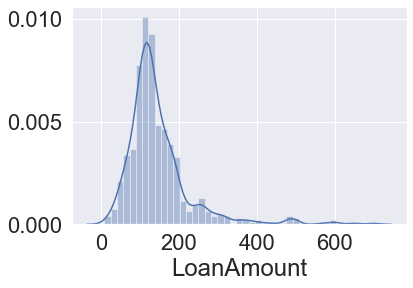

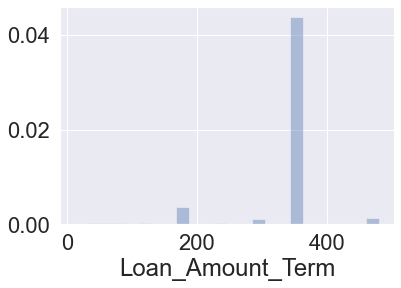

In [14]:
numerical = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']]

sns.set(font_scale = 2)

for i in numerical:
    sns.distplot(train[i])
    plt.show()

## From density plot  following inferences are drawn

### Most of applicant income distribution is towards left. i.e not normaly distributed
### Majority of coapplicant income is from 0 to 5000

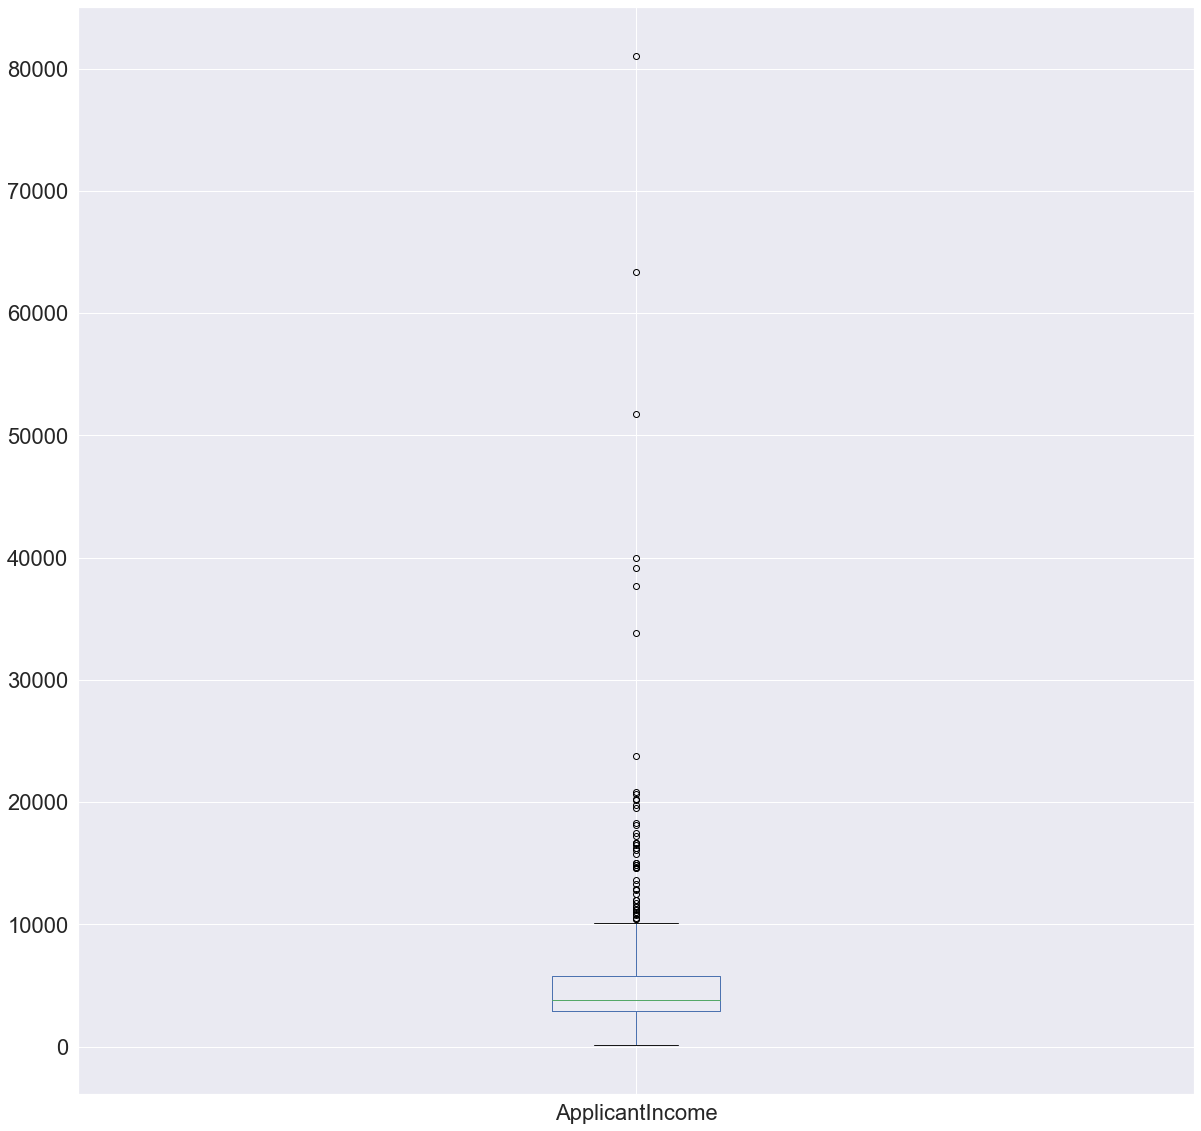

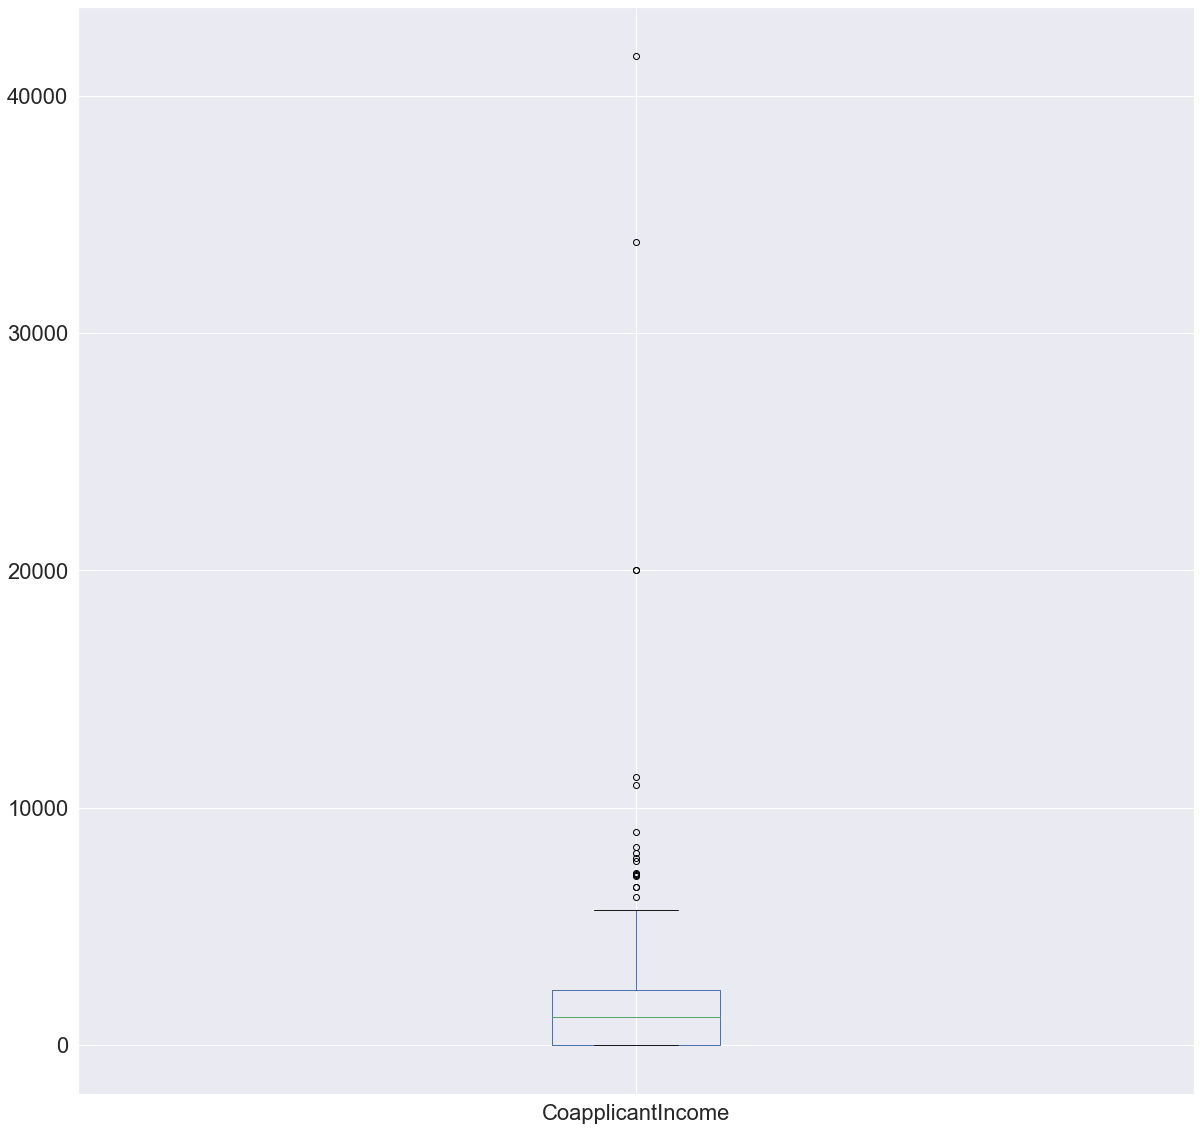

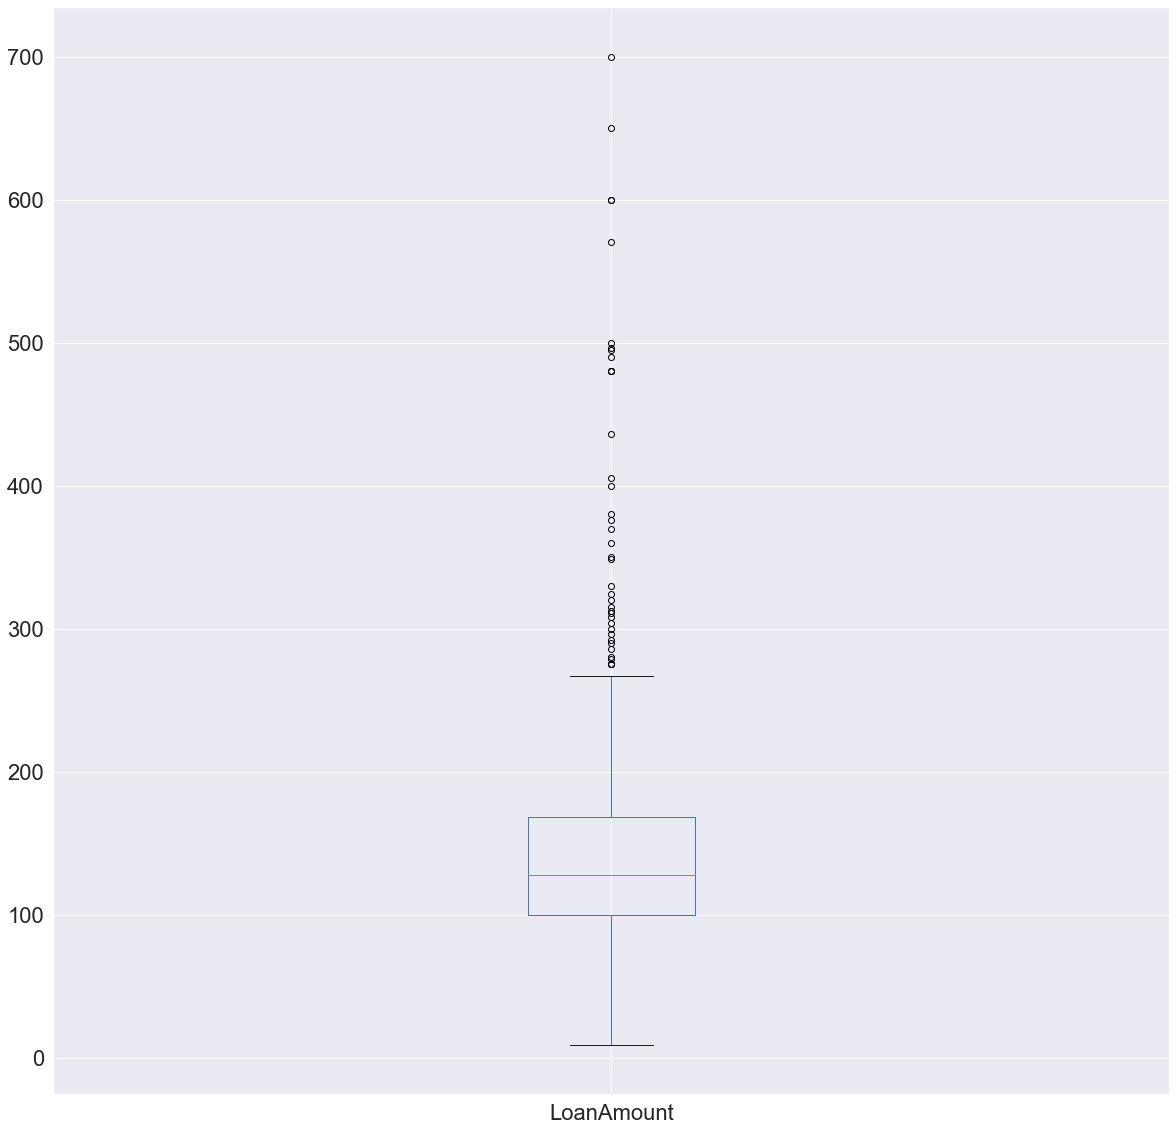

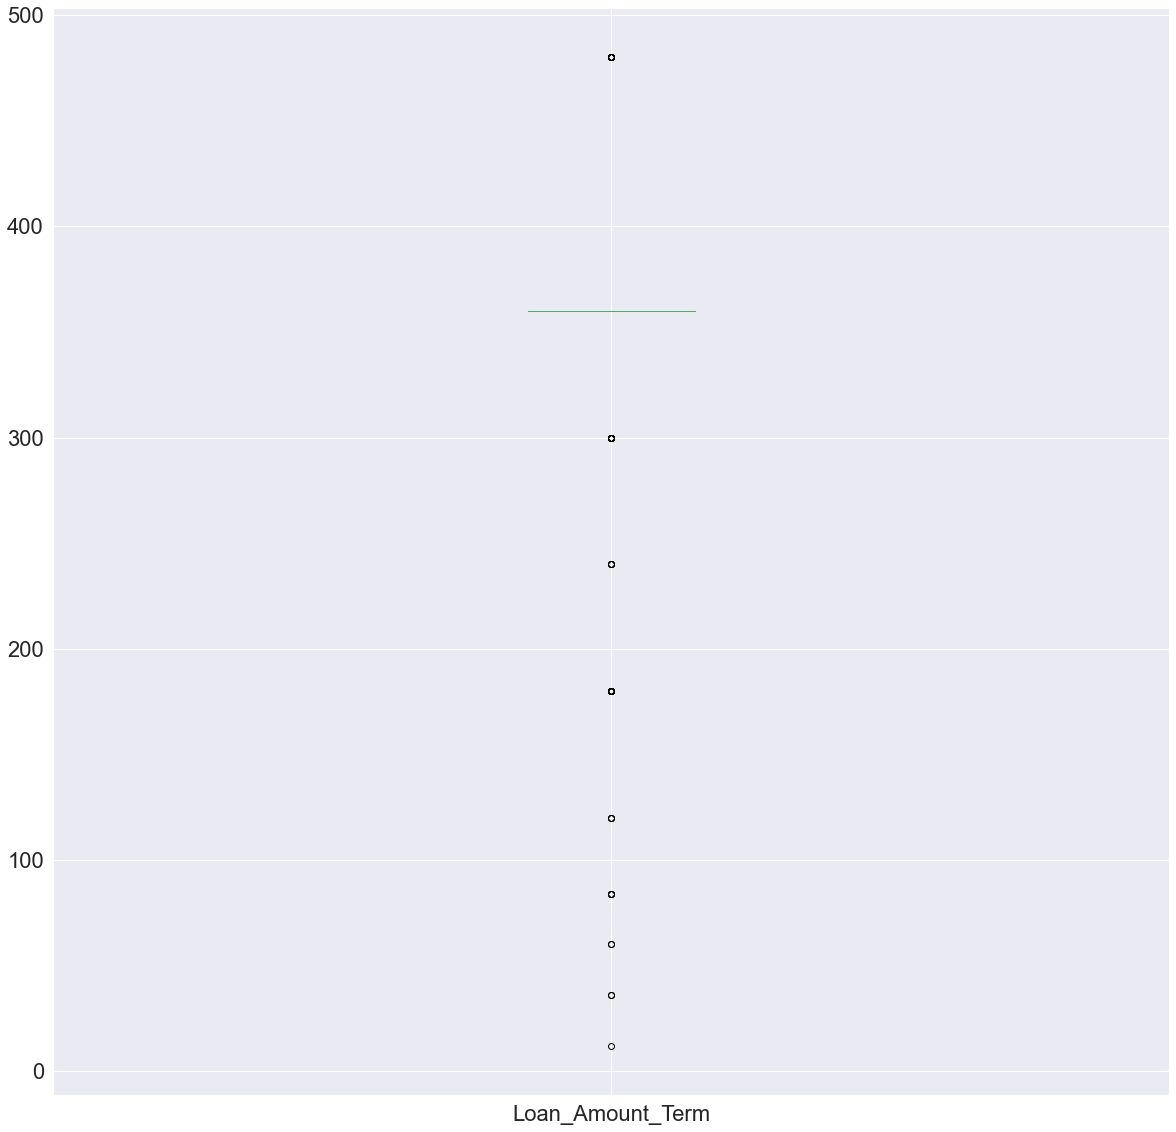

In [15]:
sns.set(font_scale = 2)

for i in numerical:
    train[i].plot.box(figsize = (20,20))
    plt.show()

## From box plot  following inferences are drawn

### A lot of extreme values / outliers are present and 
### This can be attributed to income disparity in society

Text(0.5, 0.98, '')

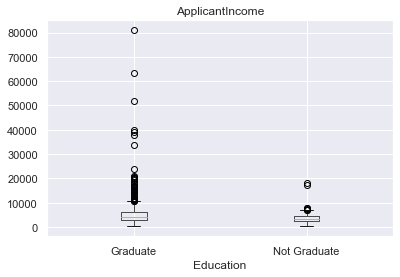

In [16]:
sns.set(font_scale = 1)
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

### There are higher number of graduates with very high incomes, which are appearing to be outliers.

# Bivariate Analysis

### Salary - Applicants with high income should have more chances of loan approval.

### Previous History - Applicants who have repayed their previous debts should have more chances of loan approval.

### Loan Amount - If loan amount is less, should have more chances of loan approval.

### Loan Term -  Loan for less time period should have more chances of loan approval.

### EMI - Lesser the amount to be paid monthly to repay the loan should have more chances of loan approval.

## Let's try to test above mentioned hypothesis using Bivariate Analysis 

## Categorical Independent Variables Vs Target Variable

### Stacked Bar Plot gives us proportion of approved and non approved loans

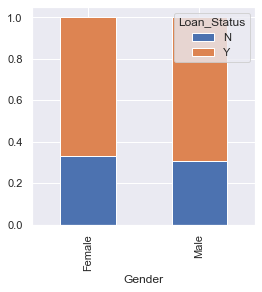

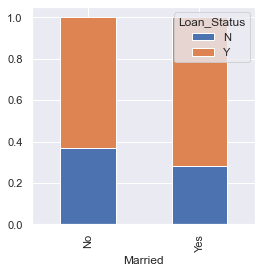

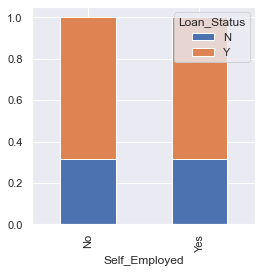

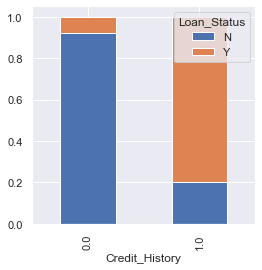

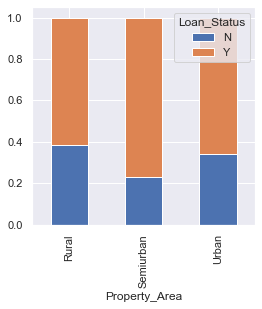

In [17]:
categorical_new = train[['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Property_Area']]

for i in categorical_new:
    i = pd.crosstab(train[i], train['Loan_Status'])
    i.div(i.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
    plt.show()

## From stacked bar plot following inferences are drawn

### Proprtion of male and female applicants is more or less same for both approved and non approved loans 
### Proportion of married applicant is more for approved loans
### Distribution of applicants with 1 or 3+ dependents is similar across both categories of Loan_Status
### We can't significantly infere from Self_Employed Vs Loan_Status plot
### People with credit history 1 are more likely to get their loan approved
### Proportion of loan getting approved in semiurban area is higher as compared to rural and urban areas

## Numerical Independent Variables Vs Target Variable

### we will try to find mean income of people with loan appproved and mean income of people with loan not appproved

### Y axis represents mean of numerical variables

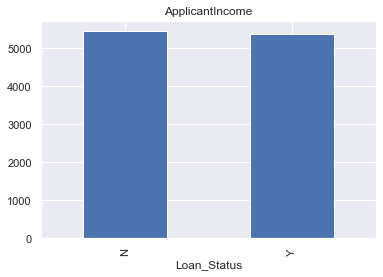

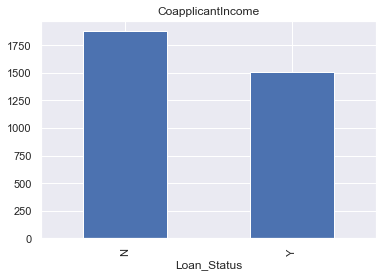

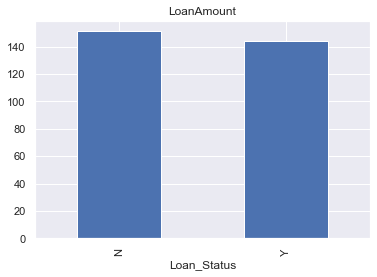

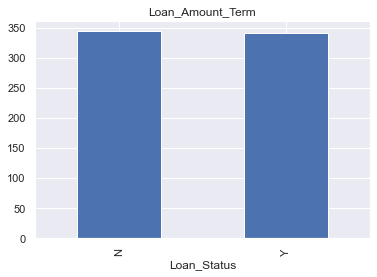

In [18]:
for i in numerical:
    train.groupby('Loan_Status')[i].mean().plot.bar()
    plt.title(i)
    plt.show()
#train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

### We don't see any significant change in mean so lt's make bins for numerical variables based on values in it and analyzing corresponding loan status for each bin

Text(0, 0.5, 'Percentage')

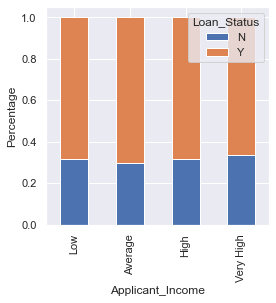

In [19]:
# Applicant Income
bins=[0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Applicant_income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Applicant_income_bin = pd.crosstab(train['Applicant_income_bin'], train['Loan_Status'])
Applicant_income_bin.div(Applicant_income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Applicant_Income')
plt.ylabel('Percentage')

### It can be inffered that Applicant Income does not affect chances of loan approval which contradicts our hypothesis

Text(0, 0.5, 'Percentage')

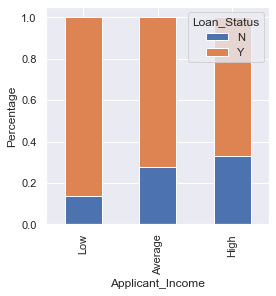

In [20]:
# Coapplicant income
bins=[0,1000,3000,42000]
group = ['Low', 'Average', 'High']
train['CoApplicant_income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
CoApplicant_income_bin = pd.crosstab(train['CoApplicant_income_bin'], train['Loan_Status'])
CoApplicant_income_bin.div(CoApplicant_income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Applicant_Income')
plt.ylabel('Percentage')

### it can be infer that lesser the coapplicant income higher the chances of loan approval, but this is not right the possible reason may be that most of the applicant have 0 coapplicant income hence loan approval is not dependent on it.

## let us combine Applicant income and Coapplicant income to visualize the combine effect of Total income on loan status

Text(0, 0.5, 'Percentage')

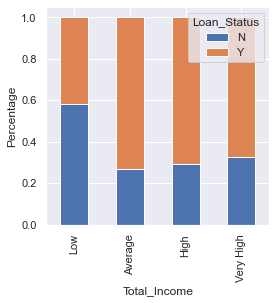

In [21]:
# Total Income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_income_bin = pd.crosstab(train['Total_income_bin'], train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

### Proportion of loan approval with low total income is very less as compared to remaing group.

Text(0, 0.5, 'Percentage')

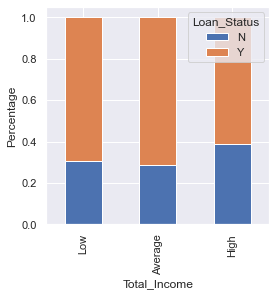

In [22]:
# Loan Amount
bins=[0,100,200,700]
group = ['Low', 'Average', 'High']
train['Loan_Amount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'], train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

### Proportion of appproved loans is higher for low and average loan amount which support our hypothesis.

## To find correlation 

### Dropping bins, 3+ to 3 numerical, target variable to 0 and 1 
### Logistic regression takes only numerical values
### N = 0 , Y = 1

In [23]:
train = train.drop(['Applicant_income_bin', 'CoApplicant_income_bin', 'Total_income_bin', 'Loan_Amount_bin', 'Total_Income'], axis =1)

train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [24]:
# Correlation Matrix

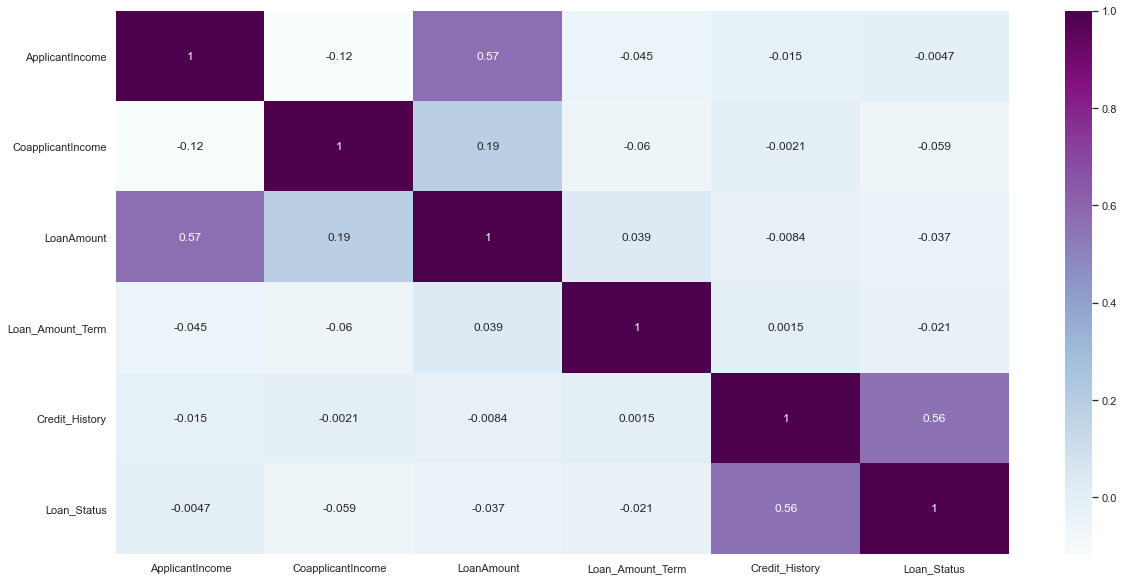

In [25]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot=True, cmap = 'BuPu')

## We can see that following pairs are corelated
### Applicant income - Loan Amount
### Credit history - Loan Status

# Missing Value imputation

In [26]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### For Categorical - imputing using mode

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

### For Numerical - imputing using mean or median

In [28]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [29]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Missing imputation Test Dataset

In [30]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [31]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

### Presence of outliers affects mean and std. deviation and hence the distribution

### Due to outliers bulk of Loan Amount data is at left side and right tail is longer - right skewness

### One way to remove skewness it log transformation, it do not affects small values but reduces larger values

### So we get distribution similar to normal distribution

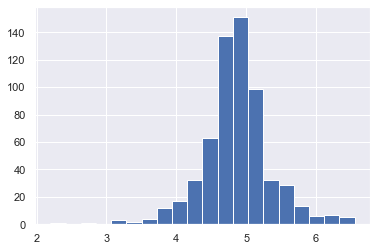

In [32]:
train['LoanAmount'] = np.log(train['LoanAmount'])
test['LoanAmount'] = np.log(test['LoanAmount'])

train['LoanAmount'].hist(bins=20)

# Model Building I

In [33]:
train = train.drop('Loan_ID', axis =1)
test = test.drop('Loan_ID', axis =1)

In [34]:
X = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

## Dummy Variables for categorical to convert them into Numerical

In [35]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

## Now we will train model on train dataset and make predictions for test dataset

### Validation - divide train dataset in to train & validation

### we will train model on train part and make predictions for validation part

### train test split to divide data train dataset

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.30, random_state = 42)

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### C parameter represents inverse of regularization strength

### regularization is applying penalty to increase the magnitude of parameter value in order to reduce overfitting

### smaller the C values specify stronger regularization

### predecting loan status for validation set and its accuracy

In [38]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.7891891891891892

### So we have predicted 78% correct loan status

## Prediction for test dataset 

In [39]:
pred_test = model.predict(test)

# Submission

In [ ]:
submission = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

pred_test = model.predict(test)

submission = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [40]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.7567567567567568

In [41]:
pred_test = model.predict(test)

In [ ]:
submission = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('Random2.csv')

## Stratified kfold validation

### Read online analytics vidya

In [42]:
from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score 0.8048780487804879

2 of kfold 5
Accuracy Score 0.8292682926829268

3 of kfold 5
Accuracy Score 0.7886178861788617

4 of kfold 5
Accuracy Score 0.7723577235772358

5 of kfold 5
Accuracy Score 0.7786885245901639


# Feature Engineering

## Total income = Applicant Income + Coapplicant Income
### If total income is high, then chances of getting loan may also be high

## EMI - Loan Amount / Loan Amount term
### monthly amount to be paid by applicant to repay the loan, people with high EMI may find it difficult to repay loan, 

## Balance Income = Total Income - EMI * 1000
### income left after EMI has been paid, if its high then people will repay loan and may increase the chances of getting loan approved


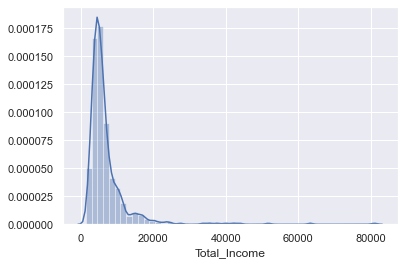

In [43]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

### From above its shifted to left = distribution is right skewed, applying log transformation to make it normal distribution,  to subside effect of outliers / extreme values

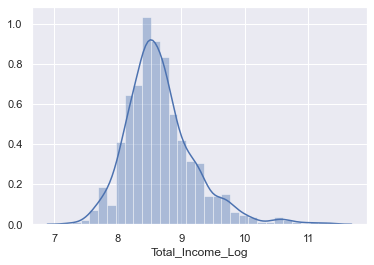

In [44]:
train['Total_Income_Log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_Log'])

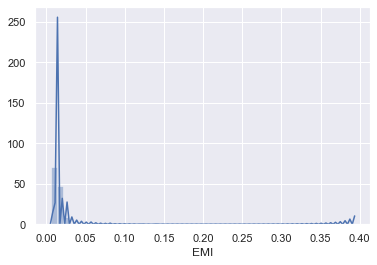

In [45]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']
sns.distplot(train['EMI'])

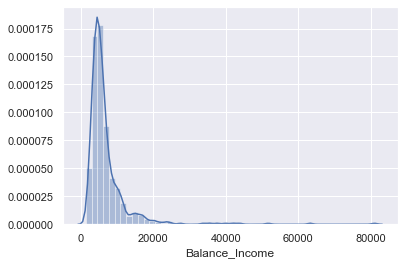

In [46]:
# multply by 1000 to make units equal
train['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI'] * 1000)
sns.distplot(train['Balance_Income'])

# Noise and Corrlation reduction
### dropping variables used to create new features 
### removing correlated features helps in noise reduction

In [47]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis =1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis =1)

In [48]:
X = train.drop(['Loan_Status', 'Total_Income_Log'], axis = 1)
y = train.Loan_Status

In [49]:
train

,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_Log,EMI,Balance_Income
0,1.0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,5849.0,8.674026,0.013851,5835.148818
1,1.0,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.013478,6077.522138
2,1.0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,3000.0,8.006368,0.011638,2988.362070
3,1.0,1,0,1,0,1,0,1,0,0,...,1,1,0,0,0,1,4941.0,8.505323,0.013299,4927.701412
4,1.0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,6000.0,8.699515,0.013747,5986.253445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,2900.0,7.972466,0.011841,2888.159223
610,1.0,1,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,4106.0,8.320205,0.020494,4085.506225
611,1.0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,8312.0,9.025456,0.015371,8296.629474
612,1.0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,7583.0,8.933664,0.014531,7568.469143


# Model Building

## Logistic regression

In [50]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score 0.7804878048780488

2 of kfold 5
Accuracy Score 0.8373983739837398

3 of kfold 5
Accuracy Score 0.7642276422764228

4 of kfold 5
Accuracy Score 0.7804878048780488

5 of kfold 5
Accuracy Score 0.7868852459016393


In [ ]:
submission = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Loan Prediction\sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('log2.csv')

# Model Building Part 2

## Logistic Regression

In [51]:
X = train.drop(['Loan_Status', 'Total_Income_Log'], axis = 1)
y = train.Loan_Status

In [52]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score 0.7804878048780488

2 of kfold 5
Accuracy Score 0.8373983739837398

3 of kfold 5
Accuracy Score 0.7642276422764228

4 of kfold 5
Accuracy Score 0.7804878048780488

5 of kfold 5
Accuracy Score 0.7868852459016393


# Decision Tree

In [53]:
from sklearn import tree

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score 0.7317073170731707

2 of kfold 5
Accuracy Score 0.7723577235772358

3 of kfold 5
Accuracy Score 0.6341463414634146

4 of kfold 5
Accuracy Score 0.6991869918699187

5 of kfold 5
Accuracy Score 0.680327868852459


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score 0.8373983739837398

2 of kfold 5
Accuracy Score 0.8373983739837398

3 of kfold 5
Accuracy Score 0.7886178861788617

4 of kfold 5
Accuracy Score 0.8130081300813008

5 of kfold 5
Accuracy Score 0.7704918032786885


# Grid Search

### Grid Search is a way to select best of a family of hyper parameter parametrized by grid of parameters

In [55]:
from sklearn.model_selection import GridSearchCV

# range from 1 to 20 by interval of 2 for max_depth
# range from 1 to 200 by interval of 20 for n_estimators

param_grid = {'max_depth': list(range(1, 20, 5)), 'n_estimators': list(range(1, 200, 50))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid)

from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.30, random_state = 1)

# fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 6, 11, 16],
                         'n_estimators': [1, 51, 101, 151]})

In [56]:
# Estimating optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=101, random_state=1)

## Lets built model with (max_depth=6, n_estimators=101, random_state=1)

In [57]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(max_depth=6, n_estimators=101, random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score 0.8292682926829268

2 of kfold 5
Accuracy Score 0.8455284552845529

3 of kfold 5
Accuracy Score 0.7886178861788617

4 of kfold 5
Accuracy Score 0.8048780487804879

5 of kfold 5
Accuracy Score 0.7868852459016393


## feature importance

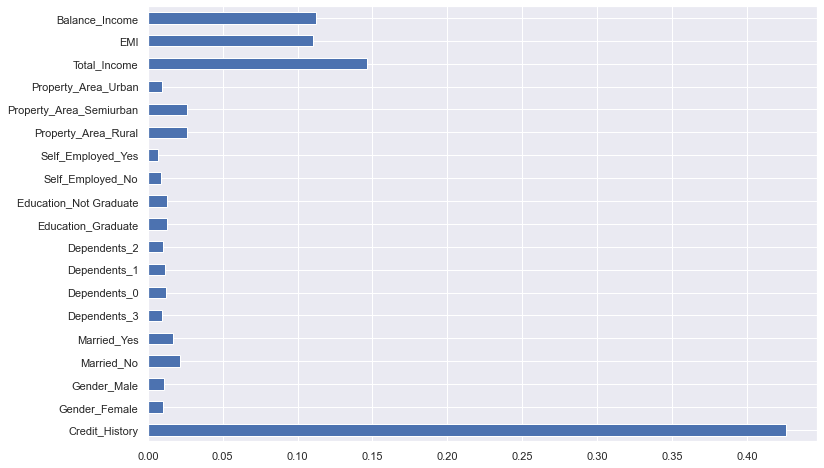

In [58]:
importances = pd.Series(model.feature_importances_, index = X.columns)
importances.plot(kind = 'barh', figsize = (12,8))

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_cv)
print(classification_report(y_cv, pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185



In [60]:
#Let's try to increase our accuracy of models
#Grid Search CV

In [61]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,1,1.1],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,1,1.1]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)

In [62]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 1.1], 'gamma': [0.1, 1, 1.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [63]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.1, 'gamma': 0.1, 'kernel': 'linear'}

In [67]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.1, gamma =  0.1, kernel= 'linear')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_cv)
print(classification_report(y_cv, pred_svc2))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        61
           1       0.70      1.00      0.83       124

    accuracy                           0.72       185
   macro avg       0.85      0.57      0.54       185
weighted avg       0.80      0.72      0.64       185



In [78]:
#Cross Validation Score for random forest 

from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()

#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 5)
rfc_eval.mean()

0.7901504787961697

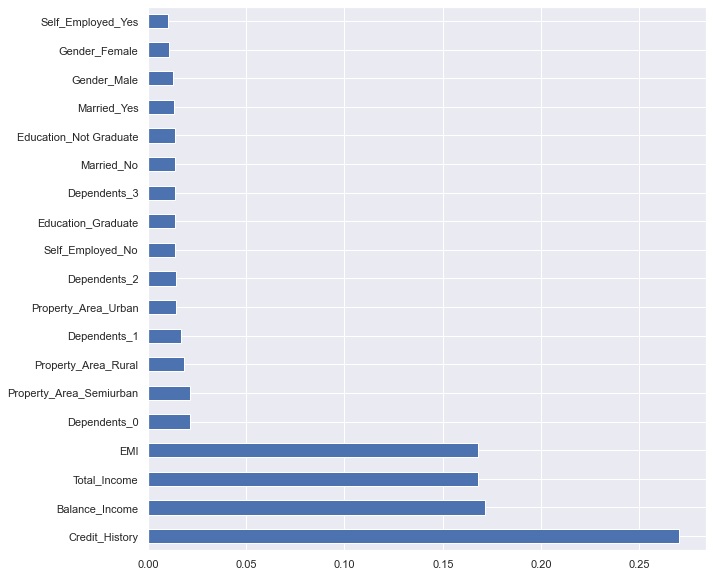

In [81]:
rfc = RandomForestClassifier()
fit = rfc.fit(x_train, y_train)
feat_importances = pd.Series(rfc.feature_importances_, index = X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))